In [1]:
import numpy as np 
import pandas as pd

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder

In [3]:
train_df = pd.read_csv('train.csv')
test_df= pd.read_csv('test.csv')
data = [train_df,test_df]


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

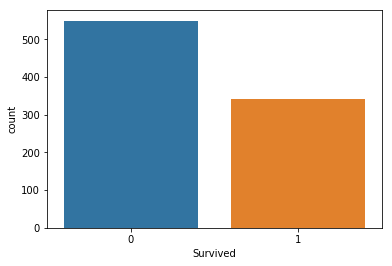

In [7]:
sns.countplot('Survived',data=train_df)

In [8]:
train_df.groupby(['Sex','Survived','Pclass'])['Survived'].count()

Sex     Survived  Pclass
female  0         1           3
                  2           6
                  3          72
        1         1          91
                  2          70
                  3          72
male    0         1          77
                  2          91
                  3         300
        1         1          45
                  2          17
                  3          47
Name: Survived, dtype: int64

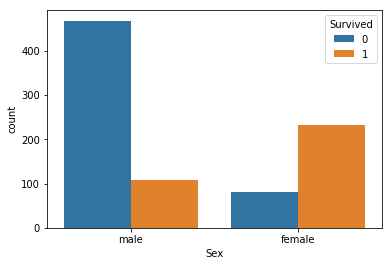

In [9]:
sns.countplot('Sex',hue='Survived',data=train_df)
plt.show()

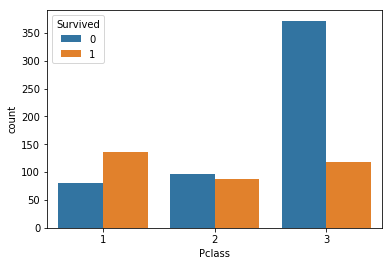

In [10]:
sns.countplot('Pclass', hue='Survived', data=train_df)
plt.show()

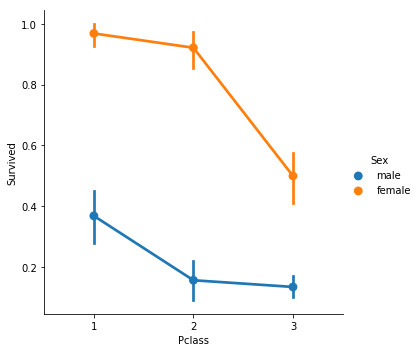

In [11]:
sns.catplot('Pclass', 'Survived', hue='Sex', data=train_df,kind='point')

In [12]:
print('Oldest person Survived was of:',train_df['Age'].max())
print('Youngest person Survived was of:',train_df['Age'].min())
print('Average person Survived was of:',train_df['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


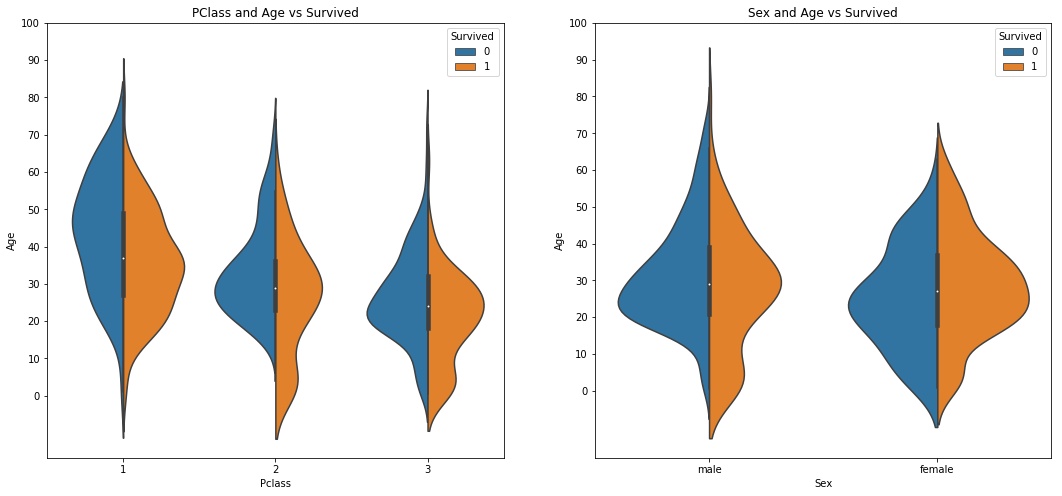

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=train_df,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [14]:
for dataset in data:
    dataset['Initial']=dataset.Name.str.extract('([A-Za-z]+)\.')
    dataset['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)
    print(dataset.groupby('Initial')['Age'].mean())
    

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64
Initial
Master     7.406471
Miss      21.774844
Mr        32.151351
Mrs       38.903226
Other     42.750000
Name: Age, dtype: float64


In [15]:
for dataset in data:
    dataset.loc[(dataset.Age.isnull()) & (dataset.Initial=='Mr'),'Age']=33
    dataset.loc[(dataset.Age.isnull()) & (dataset.Initial=='Mrs'),'Age']=36
    dataset.loc[(dataset.Age.isnull()) & (dataset.Initial=='Master'),'Age']=5
    dataset.loc[(dataset.Age.isnull()) & (dataset.Initial=='Miss'),'Age']=22
    dataset.loc[(dataset.Age.isnull()) & (dataset.Initial=='Other'),'Age']=46

0    537
1    354
Name: not_alone, dtype: int64


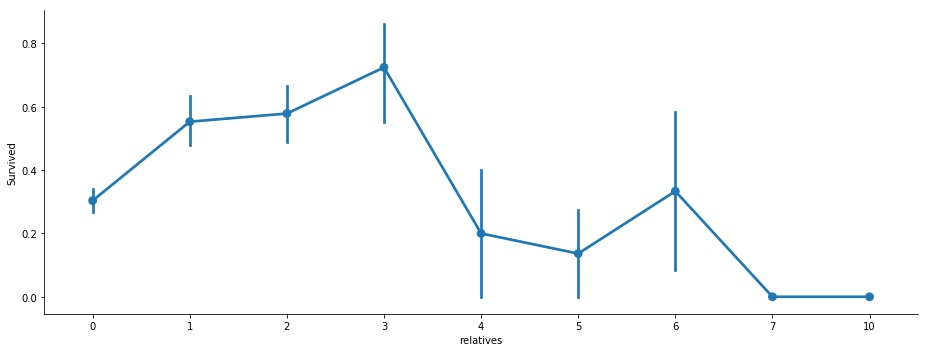

In [16]:
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 1
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 0
    dataset['not_alone'] = dataset['not_alone'].astype(int)
print(train_df['not_alone'].value_counts())
axes = sns.catplot('relatives','Survived',data=train_df, aspect = 2.6,kind='point')

In [17]:
common_value = 'S'
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [18]:
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S,Mr,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C,Mrs,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S,Mrs,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S,Mr,0,0


In [20]:
train_df = train_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test_df = test_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [21]:
port = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(port)

In [22]:
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [23]:
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [24]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [25]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,relatives,not_alone,Fare_Per_Person
0,0,3,male,2,1,0,0,0,Mr,1,1,0
1,1,1,female,5,1,0,3,1,Mrs,1,1,1
2,1,3,female,3,0,0,0,0,Miss,0,0,0
3,1,1,female,5,1,0,3,0,Mrs,1,1,1
4,0,3,male,5,0,0,1,0,Mr,0,0,1


In [26]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in data:
    dataset['Initial'] = dataset['Initial'].map(titles)

In [27]:
genders = {"male": 0, "female": 1}
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [28]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,relatives,not_alone,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,1,1,0
1,1,1,1,5,1,0,3,1,3,1,1,1
2,1,3,1,3,0,0,0,0,2,0,0,0
3,1,1,1,5,1,0,3,0,3,1,1,1
4,0,3,0,5,0,0,1,0,1,0,0,1


In [29]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,relatives,not_alone,Fare_Per_Person
0,3,0,5,0,0,0,2,1,0,0,0
1,3,1,6,1,0,0,0,3,1,1,0
2,2,0,6,0,0,1,2,1,0,0,1
3,3,0,3,0,0,1,0,1,0,0,1
4,3,1,2,1,1,1,0,3,2,1,0


In [30]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df

In [31]:
onehotencoder=OneHotEncoder(categorical_features=[1,2,3,6,7,8],categories='auto')
X_train = onehotencoder.fit_transform(X_train).toarray()
X_test = onehotencoder.fit_transform(X_test).toarray()

/home/harshit/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/harshit/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/home/harshit/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: Future

In [32]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

/home/harshit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [33]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/home/harshit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [36]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [37]:
linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [38]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [39]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
91.02,Random Forest
91.02,Decision Tree
85.30,KNN
83.50,Logistic Regression
83.16,Support Vector Machines
81.26,Stochastic Gradient Decent
43.43,Naive Bayes


In [40]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75555556 0.78888889 0.76404494 0.84269663 0.87640449 0.84269663
 0.85393258 0.79775281 0.85393258 0.85227273]
Mean: 0.8228177845874475
Standard Deviation: 0.04027853621016573


In [41]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)
train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [42]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

91.02 %
oob score: 82.49 %


In [43]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
print(clf.best_params_)

/home/harshit/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 25, 'n_estimators': 100}


In [44]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 18,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

86.53 %
oob score: 83.61 %


In [ ]:
prediction = pd.DataFrame(Y_prediction, columns=['Survived']).to_csv('prediction.csv')